In [1]:
from pydantic import BaseModel
from typing import List, Optional, Union, Set
from app import create_app, db
from app.models import Akteur
from app.models import Doc as Document


from pathlib import Path
import seaborn as sns
from logzero import setup_logger
import os

os.environ["FLASK_CONFIG"] = 'development'

app = create_app('default')
app.app_context().push()

In [2]:
parties = db.session.execute("SELECT DISTINCT party FROM akteure;")
[i[0] for i in parties]

['CDU',
 'CSU',
 'SPD',
 'DIE GRÜNEN',
 'DIE LINKE',
 'Parteilos',
 'FDP',
 'AfD',
 'Die blaue Partei']

In [3]:
akteure = db.session.execute("SELECT DISTINCT name FROM akteure;")
[i[0] for i in akteure][:10]

['achim kessler',
 'achim post',
 'afd partei',
 'agnieszka brugger',
 'albert rupprecht',
 'albert stegemann',
 'albert weiler',
 'albrecht glaser',
 'alexander dobrindt',
 'alexander gauland']

In [4]:
docs = db.session.execute("SELECT id FROM docs;")
[i[0] for i in docs][:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
parties = ['CDU',
 'CSU',
 'SPD',
 'DIE GRÜNEN',
 'DIE LINKE',
 'FDP',
 'AfD',]

In [6]:
from app.src.d01_ana.diskurs import ConfigDiscourse, AnalysisDiscourse
from app.src.d00_utils import strip_non_ascii

# parties = db.session.execute("SELECT DISTINCT party FROM akteure;")
for party in parties[::-1]:
    settings_analysis = {
        'debug': False,
        'party': party,
#         'sample': 100,
        'corpus': [],
        'niter': 1,
        'alpha': 2e-2
    }
    
    discourse_analysis = AnalysisDiscourse(strip_non_ascii(f'xps_{party}'), ConfigDiscourse(**settings_analysis))
    discourse_analysis()

KeyboardInterrupt: 

In [ ]:
from app.src.d01_ana.diskurs import ConfigDiscourse, AnalysisDiscourse

settings_analysis = {
    'debug': False,
    'party': 'AfD',
    'sample': None,
    'corpus': ['plenar'],
    'niter': 2,
    'alpha': 2e-2
    }

discourse_analysis = AnalysisDiscourse('afd_e2', ConfigDiscourse(**settings_analysis))
discourse_analysis()

Number of documents: 1982
Beginning Discourse Analysis with parameters: 
{'debug': False, 'sample': None, 'party': 'AfD', 'write_bin': False, 'nlp_model': 'de_core_news_lg', 'pipeline': ['disc'], 'corpus': ['plenar'], 'niter': 2, 'alpha': 0.02}
total examples: 83085
Seed in iteration 0: 410600
Training with alpha 0.02:
Epoch: 1 | Loss: 13378516.0
Loss difference: 13378516.0
saving best model in epoch 1 with loss 13378516.0


Number of documents: 1982
Beginning Discourse Analysis with parameters: 
{'debug': False, 'sample': None, 'party': 'AfD', 'write_bin': False, 'nlp_model': 'de_core_news_lg', 'pipeline': ['disc'], 'corpus': ['plenar'], 'niter': 1, 'alpha': 0.02}
total examples: 83085
Seed in iteration 0: 516347
Training with alpha 0.02:
Epoch: 1 | Loss: 2363783.5
Loss difference: 2363783.5
saving best model in epoch 1 with loss 2363783.5
Epoch: 2 | Loss: 2479480.5
Loss difference: 115697.0
Epoch: 3 | Loss: 2401999.0
Loss difference: -77481.5
Epoch: 4 | Loss: 2874737.0
Loss difference: 472738.0
Epoch: 5 | Loss: 3188113.0
Loss difference: 313376.0
Epoch: 6 | Loss: 3185959.0
Loss difference: -2154.0
Epoch: 7 | Loss: 1529770.0
Loss difference: -1656189.0
saving best model in epoch 7 with loss 1529770.0
Epoch: 8 | Loss: 1482346.0
Loss difference: -47424.0
saving best model in epoch 8 with loss 1482346.0
Epoch: 9 | Loss: 1594484.0
Loss difference: 112138.0
Epoch: 10 | Loss: 1709472.0
Loss difference: 114988.0

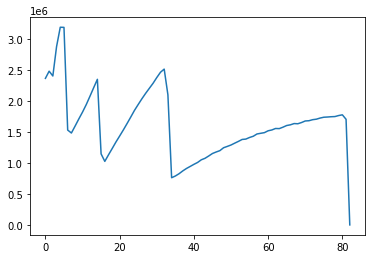

End of Iteration: 0
Discourse Analysis complete. 
Results saved in res/afd_e2_00/emb/...


In [5]:
from app.src.d01_ana.diskurs import ConfigDiscourse, AnalysisDiscourse

settings_analysis = {
    'debug': False,
    'party': 'AfD',
    'sample': None,
    'corpus': ['plenar'],
    'niter': 2,
    'alpha': 2e-2
    }

discourse_analysis = AnalysisDiscourse('afd_e2_00', ConfigDiscourse(**settings_analysis))
discourse_analysis()

In [6]:
from app.src.d01_ana.diskurs import load_models, merge_embeddings
afd = merge_embeddings(load_models('corpus_AfD', 'AfD', 0))
linke = merge_embeddings(load_models('corpus_DIE LINKE', 'DIE LINKE', 0))

In [ ]:
# beispiele: flüchtling => muslimisch, greta, eu

In [41]:
afd.wv.most_similar('covid', topn=50)

[('coronavirus', 0.8204626441001892),
 ('corona', 0.7234281301498413),
 ('coronavirusde', 0.6590244174003601),
 ('pandemie', 0.636387288570404),
 ('virus', 0.6256230473518372),
 ('coronapandemie', 0.6238465905189514),
 ('rki', 0.6039702296257019),
 ('coronakrise', 0.592658281326294),
 ('coronavirusdeutschland', 0.585544228553772),
 ('lockdown', 0.5821459889411926),
 ('shutdown', 0.5495396852493286),
 ('coronadeutschland', 0.5447360277175903),
 ('infektion', 0.5387226939201355),
 ('test', 0.5214454531669617),
 ('krise', 0.5203875303268433),
 ('erkranken', 0.5165655612945557),
 ('epidemie', 0.49135419726371765),
 ('taiwan', 0.4889797270298004),
 ('eindämmung', 0.47626739740371704),
 ('testen', 0.47211575508117676),
 ('ausbreitung', 0.46859338879585266),
 ('lockdowns', 0.4635169506072998),
 ('who', 0.46081557869911194),
 ('drosten', 0.4571598470211029),
 ('bewältigung', 0.4531274735927582),
 ('impfzwang', 0.4530617594718933),
 ('impfstoff', 0.4528917074203491),
 ('asp', 0.4446054697036743

In [39]:
linke.wv.most_similar('muslimisch', topn=50)

[('religionsgemeinschaft', 0.5460195541381836),
 ('mitbürger', 0.5078687071800232),
 ('religiös', 0.48843467235565186),
 ('jesidisch', 0.48197537660598755),
 ('mädchen', 0.47143691778182983),
 ('katholik', 0.4708557426929474),
 ('homosexuelle', 0.4669414460659027),
 ('jüdisch', 0.46134981513023376),
 ('kirchlich', 0.45772379636764526),
 ('verband', 0.4572468400001526),
 ('gruppe', 0.4442695677280426),
 ('minderheit', 0.44236326217651367),
 ('synagoge', 0.4405677616596222),
 ('benachteiligung', 0.43973395228385925),
 ('religions', 0.43856245279312134),
 ('rohingya', 0.43836474418640137),
 ('katholisch', 0.43265530467033386),
 ('mann', 0.4193218946456909),
 ('muslim', 0.4177837669849396),
 ('repräsentant', 0.41148319840431213),
 ('benachteiligen', 0.40522876381874084),
 ('christlich', 0.3957989811897278),
 ('christchurch', 0.3895948529243469),
 ('herkunft', 0.38916662335395813),
 ('kopftuch', 0.38857918977737427),
 ('unmittelbar', 0.3818233013153076),
 ('jude', 0.38084033131599426),
 ('a

In [13]:
afd.wv.most_similar('merkel')

[('bundeskanzlerin', 0.5095767974853516),
 ('angela', 0.4930284023284912),
 ('denken', 0.4398435652256012),
 ('gedanke', 0.41119757294654846),
 ('erwähnen', 0.4046837091445923),
 ('macron', 0.40284088253974915),
 ('deutsche', 0.3980730175971985),
 ('cdu', 0.3965986967086792),
 ('ausstehen', 0.3964647352695465),
 ('verhandeln', 0.3925127387046814)]

In [5]:
afd.wv.most_similar('merkel')

[('stemmen', 0.3393068015575409),
 ('ausgeprägt', 0.3384630084037781),
 ('unterschrift', 0.32691940665245056),
 ('weber', 0.3194568455219269),
 ('betroffen', 0.31596729159355164),
 ('siedlungsgebiet', 0.3147773742675781),
 ('kairoer', 0.31320494413375854),
 ('nachmittag', 0.30827680230140686),
 ('internet', 0.3072393834590912),
 ('frist', 0.30292680859565735)]

In [ ]:
discourse_analysis.doc_labels[3125].autor.byear

In [3]:
from app.src.d01_ana.analysis import Config, Analysis

settings_analysis = {
    'debug': False,
    'sample': None,
    'clf_model': 'joeddav/xlm-roberta-large-xnli',
    'corpus': ['plenar'],
    'pipeline': ['extensions', 'sentiment', 'entity', 'res', 'spans', 'clf']
    }

content_analysis = Analysis('test', Config(**settings_analysis))
content_analysis(to_disk=False, to_db=True)
res = content_analysis.get_results()

DatabaseError: (sqlite3.DatabaseError) database disk image is malformed
(Background on this error at: http://sqlalche.me/e/13/4xp6)

In [ ]:
res.prepare()
res.coding()

In [ ]:
content_analysis.res_to_disk()

In [ ]:
db.session.commit()

In [ ]:
Document.query.first().

In [ ]:
i = 0
seen = set()
for v in res.viz:
    for hit in v:
        if hit.SPAN_IS_POP:
            seen.add(hit.span_start)
            i += 1
print(i)

- after clf: document-level coding, that will be written to database (has_pop, has_coding, has_entity, RSN) -> decide for final version of viz and doc_res
- fix visualize (should work from db, with labels as input)
- add presse corpus
- write a few crucial tests for ca and da
- class & config for discourse_ana
- finalize dictionaries!
- additional clfs?
- EVALUATIONSET
- run final analysis